# Programming Exercise 4: Neural Networks Learning

In [1]:
# Importing the needed libraries
# import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from neuralNetwork import *

# Optimization module in scipy
from scipy import optimize

# We'll use loadmap to load the matlab dataset
from scipy.io import loadmat

# tells matplotlib to embed plots within the notebook
%matplotlib inline

In [2]:
input_layer_size  = 400  # 20x20 Input Images of Digits
hidden_layer_size = 25   # 25 hidden units
num_labels = 10          # 10 labels, from 0 to 9 - output layer

# trying to represent the NN using an array.
# nnDef.shape[0] = number of layers
# nnDef[i] = number of neurons on layer i
nnDef = np.array([input_layer_size, hidden_layer_size, num_labels])

In [3]:
# Loading all data on a dictonary
data = loadmat('ex4data1.mat')

# Convert the data into a numpy array
X = data['X']
y = data['y'].flatten()

# m = number of training examples
# n = number of features
(m,n) = X.shape

# note that X has mapped "0" to label 10 because Matlab arrays start on 1
# We'll normalize the 10 value back to 0, so it matches the 0 digit
y[y == 10] = 0

In [4]:
# We create a Theta array of arrays
Theta = np.zeros(nnDef.size, dtype=np.ndarray)

# Load the weights data to initialize Theta
thetaMat = loadmat('ex4weights.mat')
Theta[1] = thetaMat['Theta1']
Theta[2] = thetaMat['Theta2']

# swap first and last columns of Theta2, due to legacy from MATLAB indexing, 
# since the weight file ex3weights.mat was saved based on MATLAB indexing
# Explanation: 0 in MATLAB is represented by 10. 
# Therefore the theta for 10 in Matlab corresponds with 0 in Python
Theta[2] = np.roll(Theta[2], 1, axis=0)

## Compute Cost Function (Feedforward)

In [5]:
Theta1D = ThetaTo1D(Theta, nnDef)

In [6]:
J, grad = nnCostFunction(Theta1D, nnDef, X, y, 0);

print('Cost at parameters (loaded from ex4weights): {:.6f} \n(this value should be about 0.287629)\n'.format(J))

Cost at parameters (loaded from ex4weights): 0.287629 
(this value should be about 0.287629)



## Implement Regularization in the Cost Function

In [7]:
lmbd = 1

J, grad = nnCostFunction(Theta1D, nnDef, X, y, lmbd)

print('Cost at parameters (loaded from ex4weights): {:.6f} \n(this value should be about 0.383770)\n'.format(J))

Cost at parameters (loaded from ex4weights): 0.383770 
(this value should be about 0.383770)



## Checking NN gradients

In [8]:
lmbd = 3
J, grad = nnCostFunction(Theta1D, nnDef, X, y, lmbd)

print('Cost at (fixed) debugging parameters (w/ lambda = 3) {:.6f}\n(for lambda = 3, this value should be about 0.576051)\n'. format(J))

Cost at (fixed) debugging parameters (w/ lambda = 3) 0.576051
(for lambda = 3, this value should be about 0.576051)



## Train the NN

In [9]:
Theta= initializeTheta(nnDef)
Theta1D = ThetaTo1D(Theta, nnDef)

In [10]:
lmdb = 0

# set options for optimize.minimize
options= {'maxiter': 800}

# The function returns an object `OptimizeResult`
# We use truncated Newton algorithm for optimization which is 
# equivalent to MATLAB's fminunc
# See https://stackoverflow.com/questions/18801002/fminunc-alternate-in-numpy
res = optimize.minimize(nnCostFunction,
                        Theta1D,
                        (nnDef, X, y.flatten(), lmbd),
                        jac=True,
                        method='TNC',
                        options=options)

# the fun property of `OptimizeResult` object returns
# the value of costFunction at optimized theta
cost = res.fun

# the optimized theta is in the x property
theta = res.x

# Print theta to screen
print('Cost at theta found by optimize.minimize: {:.3f}'.format(cost))

Cost at theta found by optimize.minimize: 0.558


## Evaluate the NN

In [11]:
Theta = ThetaFrom1D(theta, nnDef)

In [12]:
Prob, pred = feedForwardPropagation(Theta, X, nnDef)

In [13]:
print('\nTraining Set Accuracy: {:.2f} %'.format(np.mean(pred == y) * 100))


Training Set Accuracy: 97.72 %


## Check the cases non predicted properly

In [14]:
Check_cases = 25

# First we identify the cases where the prediction 
# is not correct - misclassified 
misclX = X[pred != y]
correct_label = y[pred != y]
miscl_label = pred[pred !=y]
miscl_prob = np.amax(Prob[pred !=y], axis=1)

miscl_m = miscl_label.size

# We get a testCases random datapoints. First we get a number of testCases indices out of m
rand_indices = np.random.choice(miscl_m, Check_cases, replace=False)

sel_misclX = misclX[rand_indices, :]
sel_correct_label = correct_label[rand_indices]
sel_miscl_label = miscl_label[rand_indices]
sel_miscl_prob = miscl_prob[rand_indices, ]

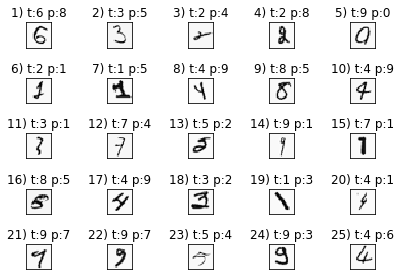

array([0.16939396, 0.36452263, 0.61581002, 0.36996646, 0.70543422,
       0.51664506, 0.12943882, 0.44621622, 0.44670423, 0.23785355,
       0.43693518, 0.14871329, 0.65242633, 0.45413583, 0.33359316,
       0.28151734, 0.34363878, 0.48780268, 0.13778545, 0.81010904,
       0.51484449, 0.4621716 , 0.28730829, 0.75099777, 0.6704452 ])

In [15]:
fig, ax = plt.subplots(nrows = 5, ncols = 5, sharex = True, sharey = True)
ax = ax.flatten()
for i in range(Check_cases):
    img = sel_misclX[i].reshape(20,20).T
    ax[i].imshow(img, cmap = 'Greys', interpolation = 'nearest')
    ax[i].set_title('%d) t:%d p:%d' % (i+1,sel_correct_label[i], sel_miscl_label[i]))
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

sel_miscl_prob

## Check the cases predicted properly

In [16]:
Check_cases = 25

# First we identify the cases where the prediction 
# is not correct - misclassified 
misclX = X[pred == y]
correct_label = y[pred == y]
miscl_label = pred[pred == y]

miscl_m = miscl_label.size

# We get a testCases random datapoints. First we get a number of testCases indices out of m
rand_indices = np.random.choice(miscl_m, Check_cases, replace=False)

sel_misclX = misclX[rand_indices, :]
sel_correct_label = correct_label[rand_indices]

sel_miscl_label = miscl_label[rand_indices]

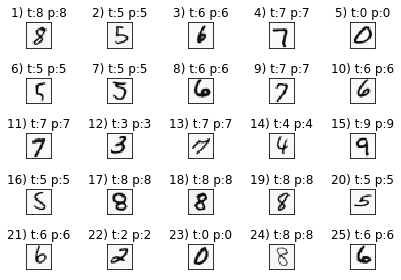

In [17]:
fig, ax = plt.subplots(nrows = 5, ncols = 5, sharex = True, sharey = True)
ax = ax.flatten()
for i in range(Check_cases):
    img = sel_misclX[i].reshape(20,20).T
    ax[i].imshow(img, cmap = 'Greys', interpolation = 'nearest')
    ax[i].set_title('%d) t:%d p:%d' % (i+1,sel_correct_label[i], sel_miscl_label[i]))
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()